<a href="https://colab.research.google.com/github/Homaei/DT-AI/blob/main/Water_Consumption_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discussion

## RMSE vs. MAE

**Are these spikes important to you to be predicted correctly?**

**For example, for the solar storms project, exactly these spikes were very important.**

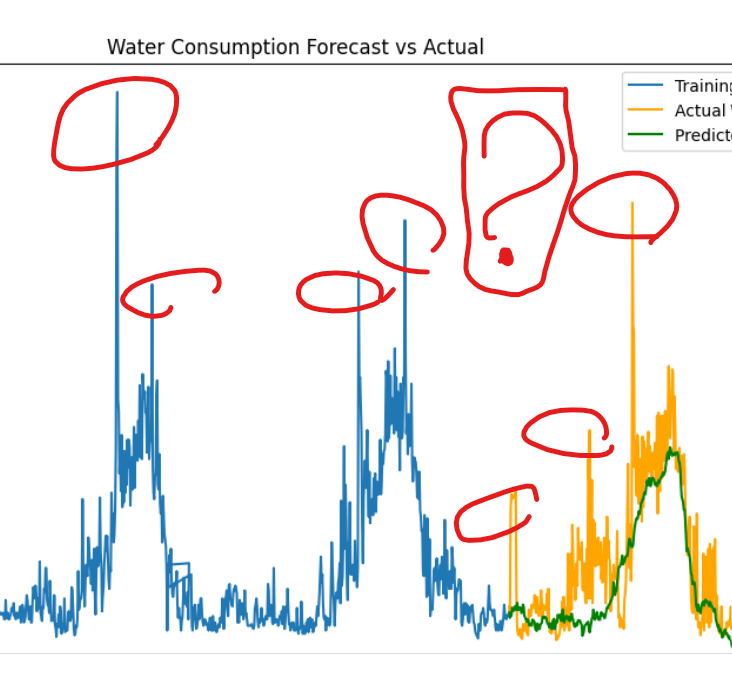

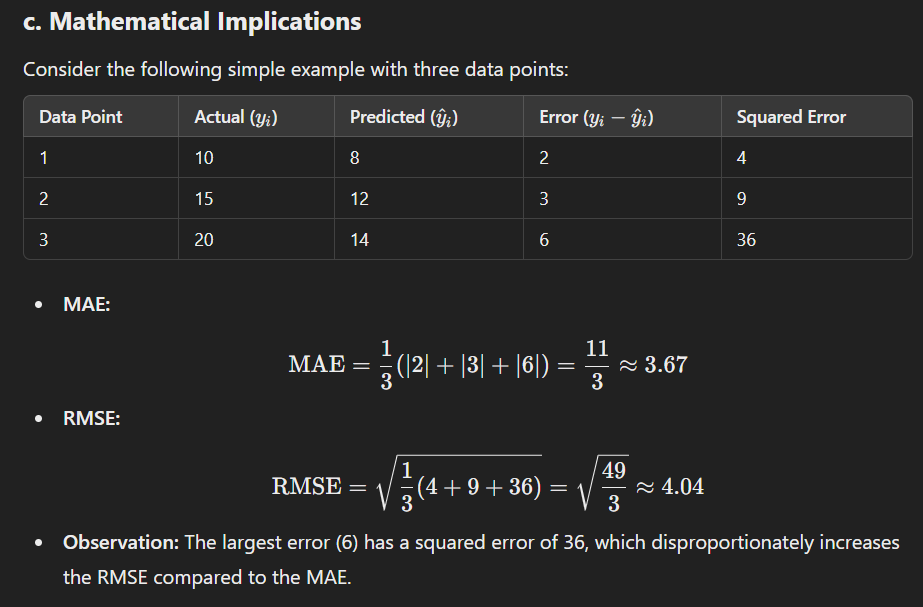

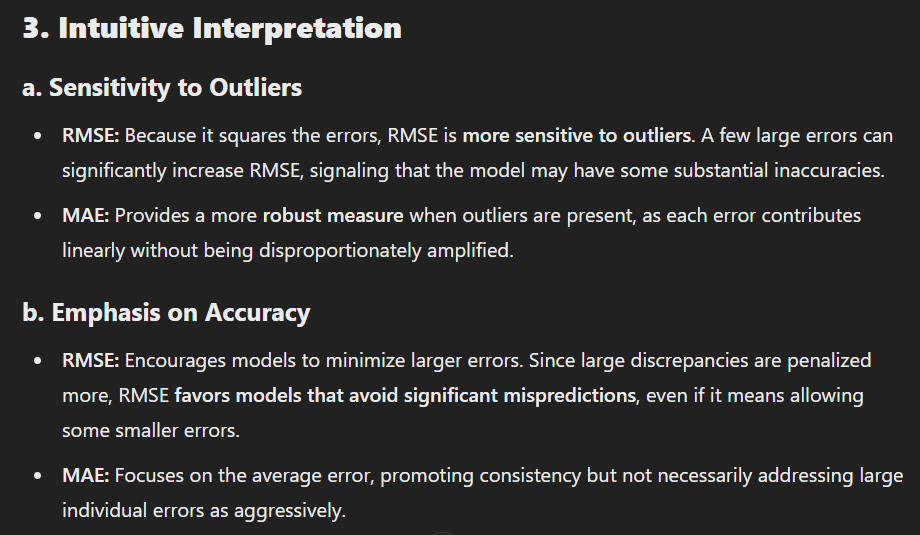

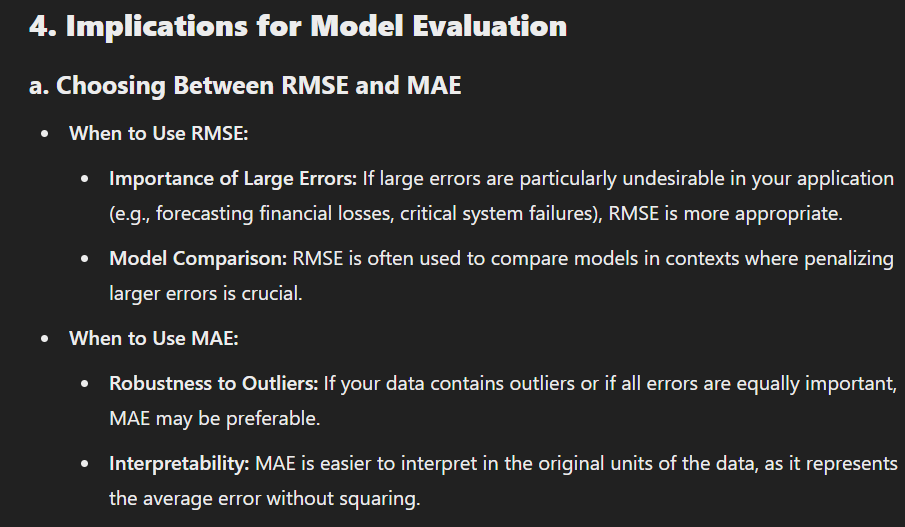

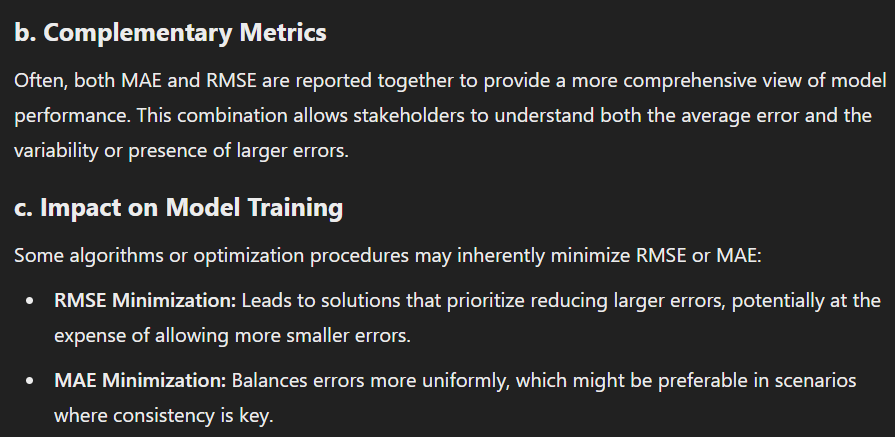

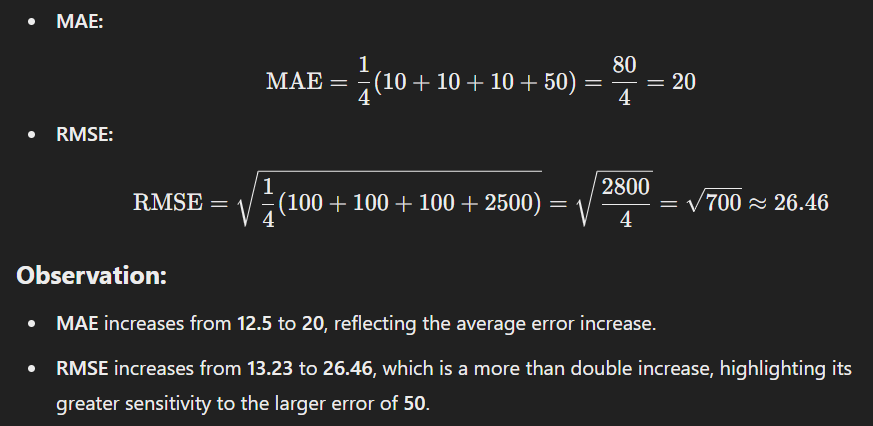

# Method 1: prophet

<ipython-input-2-0fdd5debcfac>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[regressors] = df[regressors].fillna(method='ffill')
<ipython-input-2-0fdd5debcfac>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[regressors] = df[regressors].fillna(method='ffill')
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqjv51st/a1wizf2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqjv51st/ftq83c6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/pr

Mean Absolute Error: 19.32
Root Mean Squared Error: 28.37


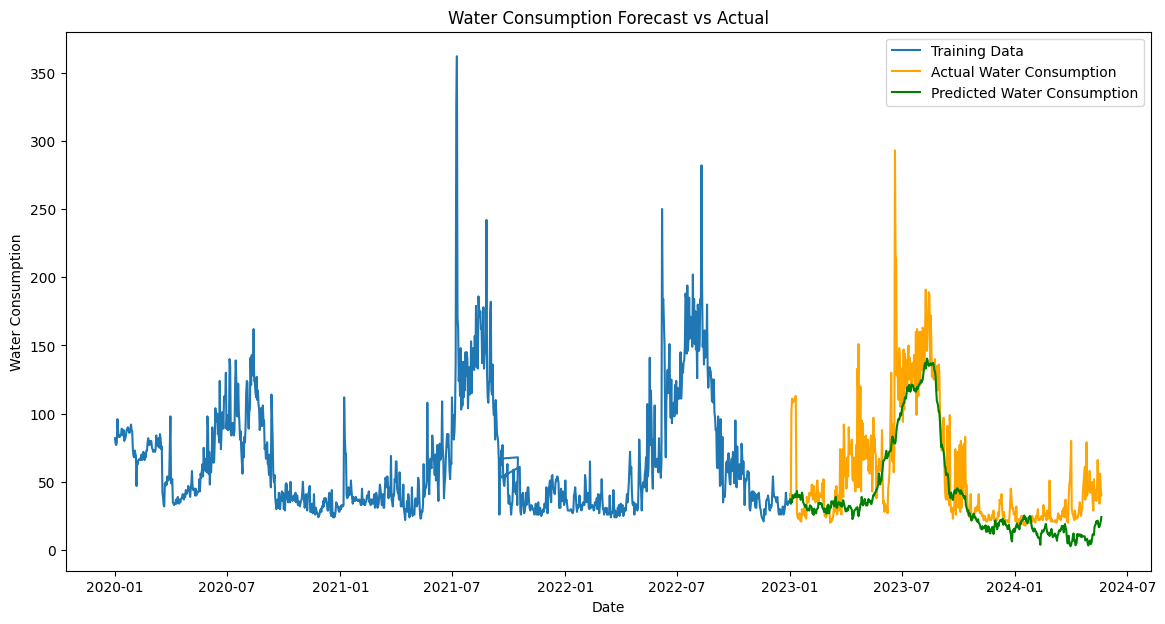

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

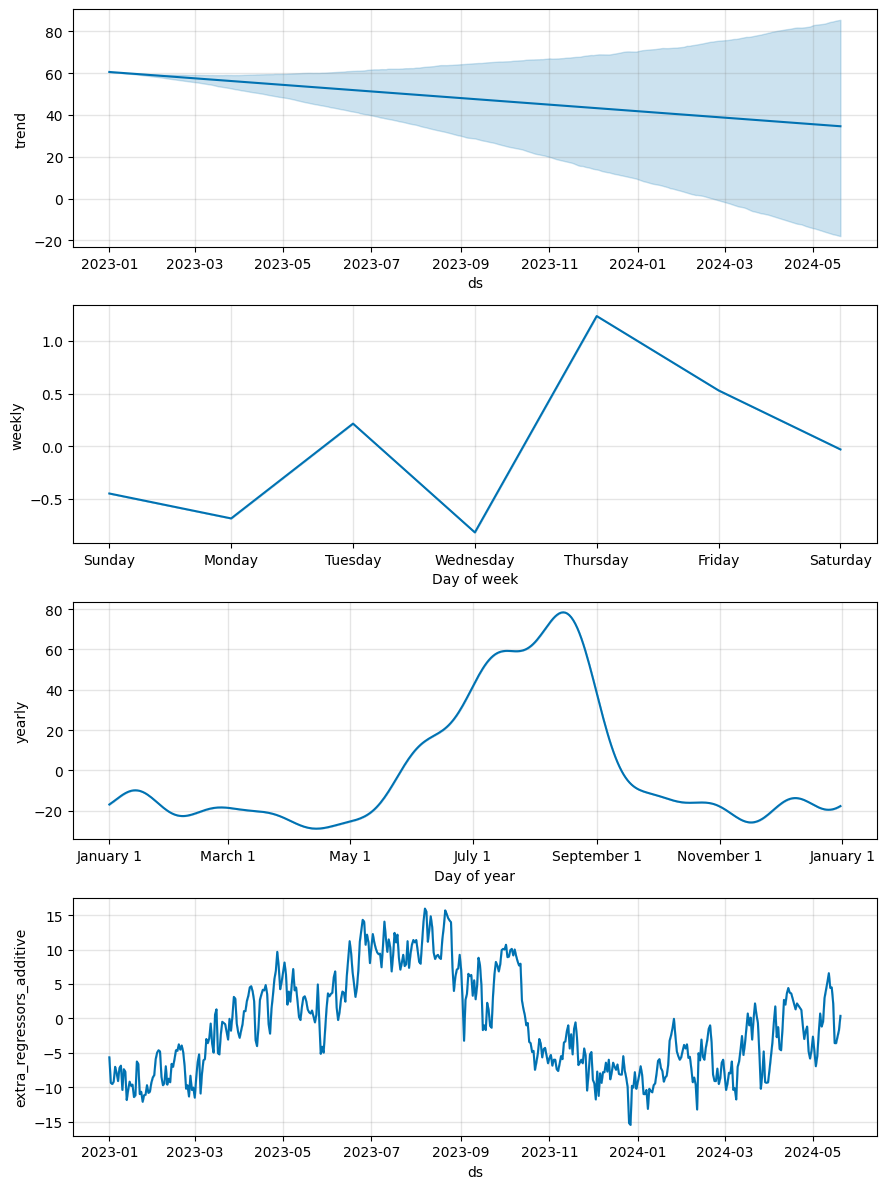

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.rename(columns={'Date': 'ds', 'Value': 'y'})

# Handle missing values in 'y'
df = df.dropna(subset=['y'])

# List of regressor columns
regressors = ['tmax']

# Handle missing values in regressors
df[regressors] = df[regressors].fillna(method='ffill')

# Split data into training and testing sets
# Assuming we use data before '2023-01-01' for training and after for testing
split_date = '2023-01-01'
train = df[df['ds'] < split_date].copy()
test = df[df['ds'] >= split_date].copy()

# Initialize and fit the model
m = Prophet()

# Add regressors to the model
for regressor in regressors:
    m.add_regressor(regressor)

# Fit the model to the training data
m.fit(train)

# Prepare future dataframe for prediction
# For testing, we need to provide the regressor values for the test period
future = test[['ds'] + regressors].copy()

# Make predictions
forecast = m.predict(future)

# Evaluate the model
forecast_evaluation = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds')

mae = mean_absolute_error(forecast_evaluation['y'], forecast_evaluation['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_evaluation['y'], forecast_evaluation['yhat']))

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plot the forecast against the actual values
plt.figure(figsize=(14, 7))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Water Consumption', color='orange')
plt.plot(forecast_evaluation['ds'], forecast_evaluation['yhat'], label='Predicted Water Consumption', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('Water Consumption Forecast vs Actual')
plt.legend()
plt.show()

# Plot the forecast components
m.plot_components(forecast)
plt.show()


## New prophet

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqjv51st/u11a11_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqjv51st/j83chwm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68207', 'data', 'file=/tmp/tmpwqjv51st/u11a11_q.json', 'init=/tmp/tmpwqjv51st/j83chwm1.json', 'output', 'file=/tmp/tmpwqjv51st/prophet_modelf5xddtv5/prophet_model-20240915111444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:14:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:14:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error: 24.74
Root Mean Squared Error: 35.49


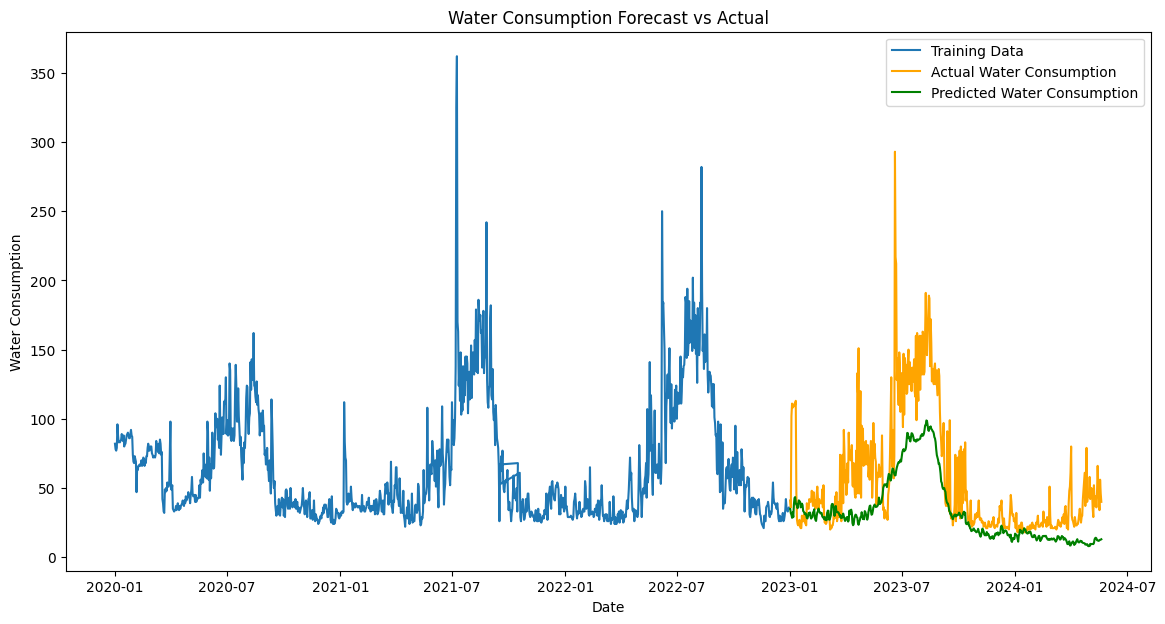

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

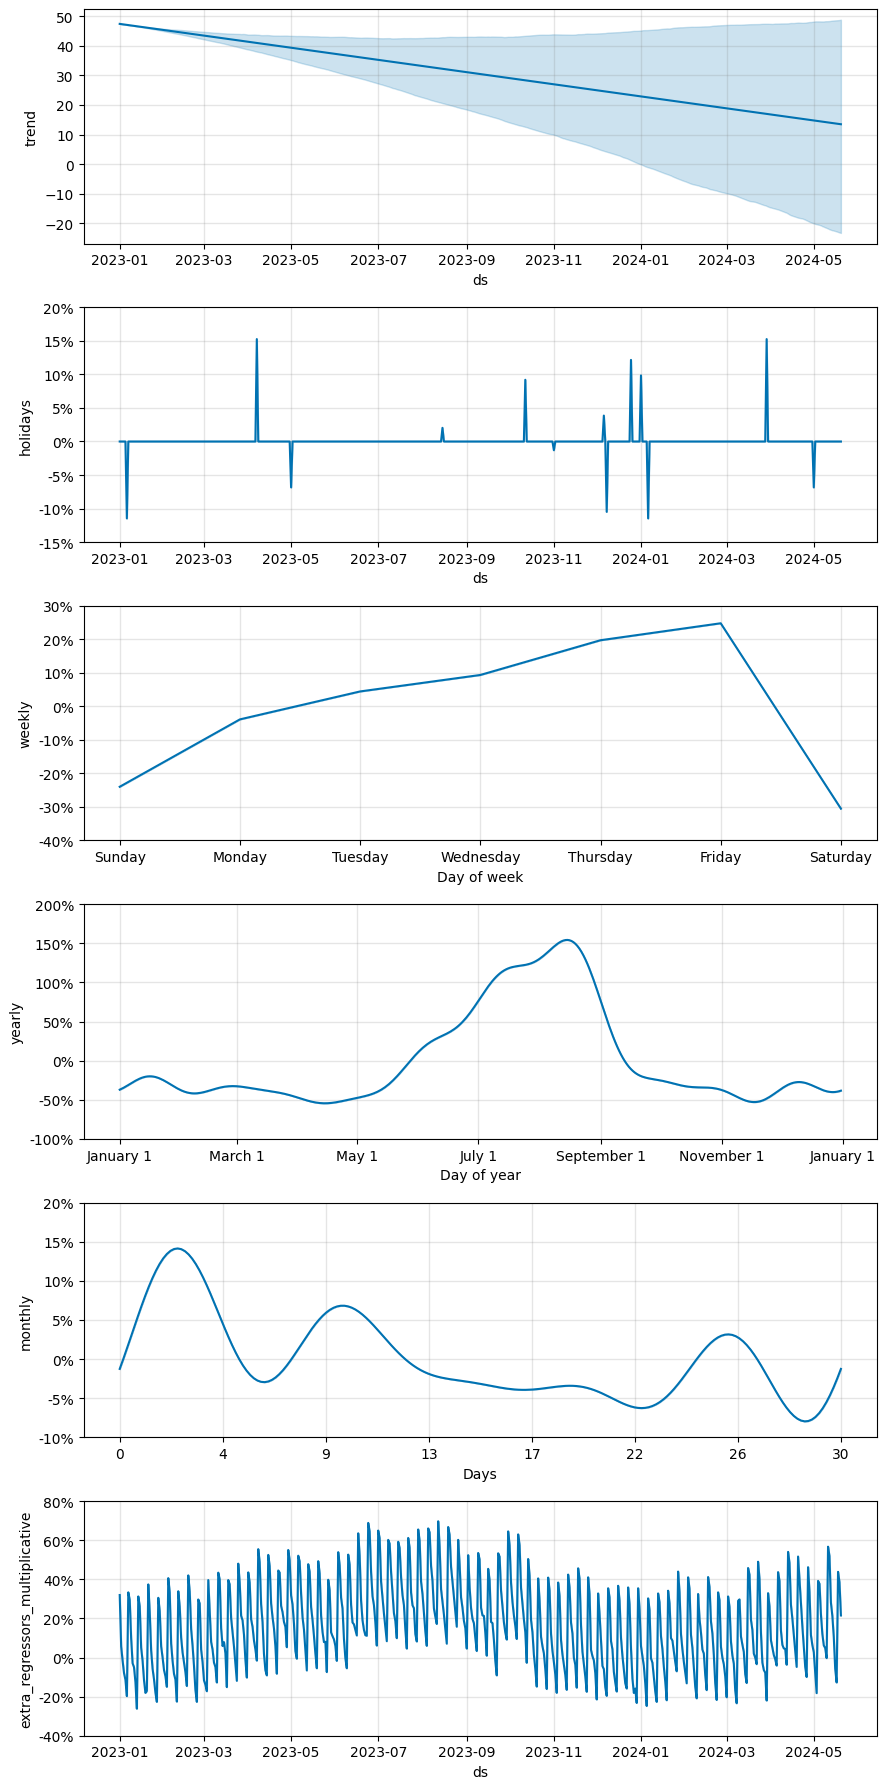

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.rename(columns={'Date': 'ds', 'Value': 'y'})

# Handle missing values in 'y'
df = df.dropna(subset=['y'])

# List of regressors
regressors = ['tmax']

# Handle missing values in regressors
df[regressors] = df[regressors].ffill()

# Additional regressors
df['day_of_week'] = df['ds'].dt.dayofweek
df['is_weekend'] = df['ds'].dt.weekday >= 5

# Update regressors list
regressors.extend(['day_of_week', 'is_weekend'])

# Split data into training and testing sets
split_date = '2023-01-01'
train = df[df['ds'] < split_date].copy()
test = df[df['ds'] >= split_date].copy()

# Initialize the model
m = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10
)

# Add country holidays
m.add_country_holidays(country_name='ES')

# Add regressors to the model
for regressor in regressors:
    m.add_regressor(regressor)

# Add custom seasonalities
m.add_seasonality(name='weekly', period=7, fourier_order=5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model to the training data
m.fit(train)

# Prepare future dataframe for prediction
future = test[['ds'] + regressors].copy()

# Make predictions
forecast = m.predict(future)

# Evaluate the model
forecast_evaluation = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds')

mae = mean_absolute_error(forecast_evaluation['y'], forecast_evaluation['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_evaluation['y'], forecast_evaluation['yhat']))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plot the forecast against the actual values
plt.figure(figsize=(14, 7))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Water Consumption', color='orange')
plt.plot(forecast_evaluation['ds'], forecast_evaluation['yhat'], label='Predicted Water Consumption', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('Water Consumption Forecast vs Actual')
plt.legend()
plt.show()

# Plot the forecast components
m.plot_components(forecast)
plt.show()


Mrthod 3

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqjv51st/r_yal51r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqjv51st/v7jpanx7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6280', 'data', 'file=/tmp/tmpwqjv51st/r_yal51r.json', 'init=/tmp/tmpwqjv51st/v7jpanx7.json', 'output', 'file=/tmp/tmpwqjv51st/prophet_modelax2nskgy/prophet_model-20240915111511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:15:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error: 11.14
Root Mean Squared Error: 18.02
Mean Absolute Percentage Error: 22.34%


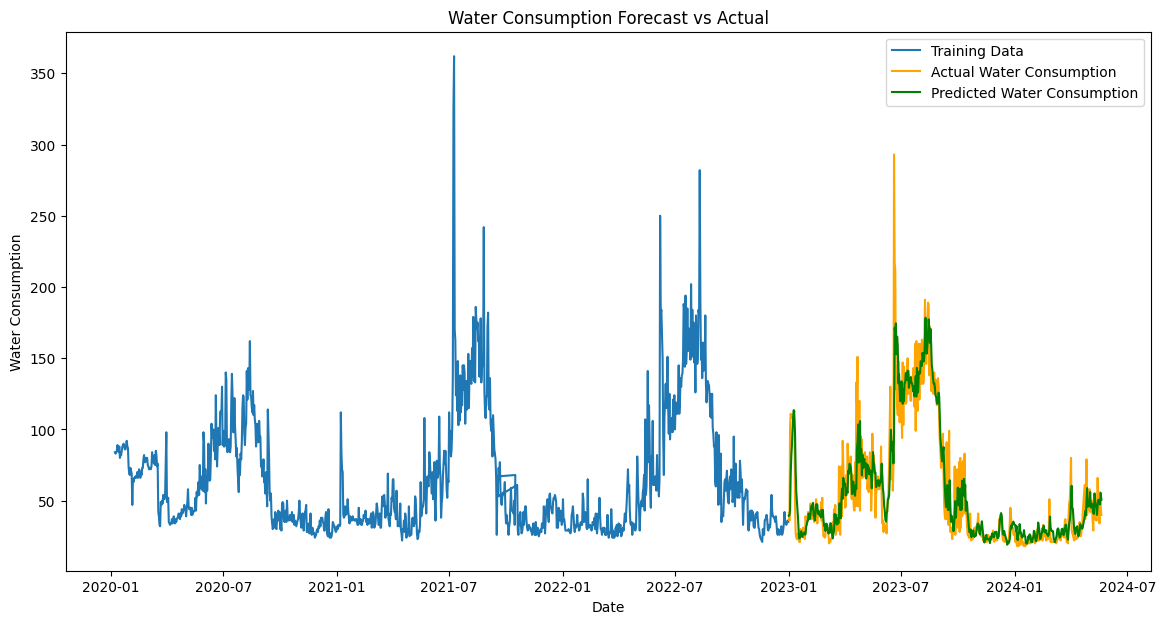

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

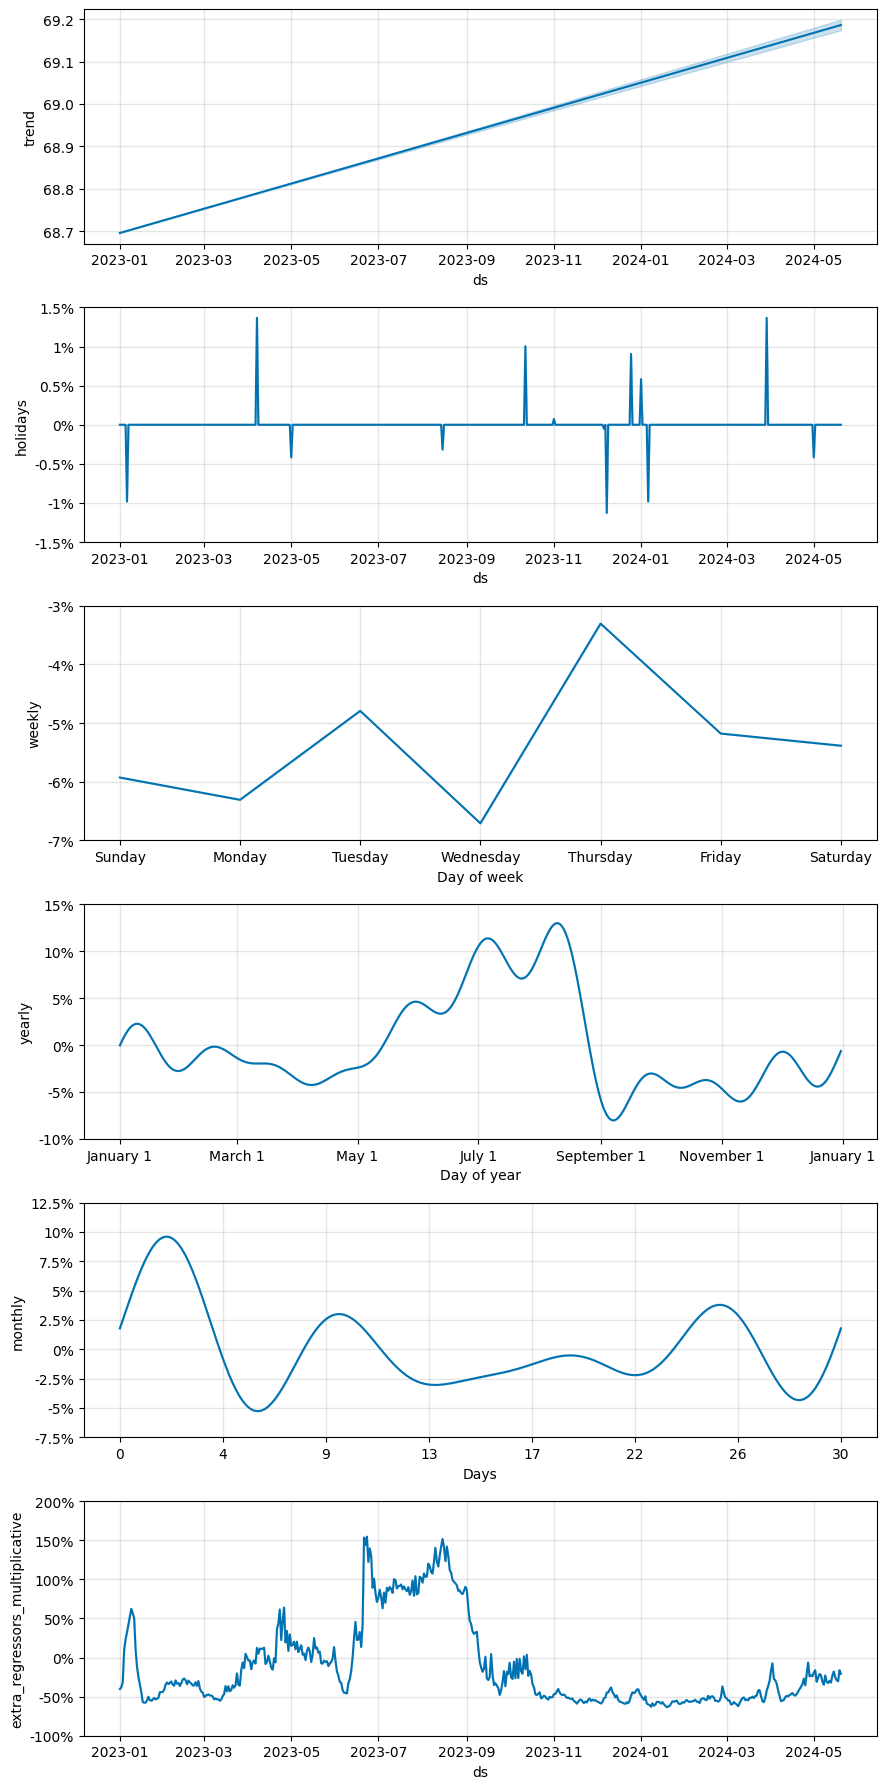

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.rename(columns={'Date': 'ds', 'Value': 'y'})

# Handle missing values
df = df.dropna(subset=['y'])
df['tmax'] = df['tmax'].ffill()

# Create lag features
df['y_lag1'] = df['y'].shift(1)
df['y_lag7'] = df['y'].shift(7)
df['tmax_lag1'] = df['tmax'].shift(1)
df['tmax_lag7'] = df['tmax'].shift(7)

# Create rolling mean features
df['y_roll_mean_7'] = df['y'].rolling(window=7).mean()
df['tmax_roll_mean_7'] = df['tmax'].rolling(window=7).mean()

# Drop rows with NaN values resulting from shifting/rolling
df = df.dropna()

# Additional regressors
df['day_of_week'] = df['ds'].dt.dayofweek
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)

# List of regressors
regressors = [
    'tmax', 'tmax_lag1', 'tmax_lag7', 'tmax_roll_mean_7',
    'y_lag1', 'y_lag7', 'y_roll_mean_7',
    'day_of_week', 'is_weekend'
]

# Normalize/Scale regressors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[regressors] = scaler.fit_transform(df[regressors])

# Split data into training and testing sets
split_date = '2023-01-01'
train = df[df['ds'] < split_date].copy()
test = df[df['ds'] >= split_date].copy()

# Initialize the model with tuned parameters
m = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.01,
    seasonality_prior_scale=15
)

# Add country holidays
m.add_country_holidays(country_name='ES')

# Add regressors to the model
for regressor in regressors:
    m.add_regressor(regressor)

# Add custom seasonalities
m.add_seasonality(name='weekly', period=7, fourier_order=10)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model to the training data
m.fit(train)

# Prepare future dataframe for prediction
future = test[['ds'] + regressors].copy()

# Make predictions
forecast = m.predict(future)

# Evaluate the model
forecast_evaluation = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds')

# Calculate error metrics
mae = mean_absolute_error(forecast_evaluation['y'], forecast_evaluation['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_evaluation['y'], forecast_evaluation['yhat']))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(forecast_evaluation['y'], forecast_evaluation['yhat'])

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Plot the forecast against the actual values
plt.figure(figsize=(14, 7))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Water Consumption', color='orange')
plt.plot(forecast_evaluation['ds'], forecast_evaluation['yhat'], label='Predicted Water Consumption', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('Water Consumption Forecast vs Actual')
plt.legend()
plt.show()

# Plot the forecast components
m.plot_components(forecast)
plt.show()


**Method 1: Prophet with Advanced Feature Engineering
**

In this method, we enhance the Prophet model by adding lagged variables, rolling statistics, and additional regressors to capture more complex patterns.

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqjv51st/817gpx6x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqjv51st/yt7dg3i6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2392', 'data', 'file=/tmp/tmpwqjv51st/817gpx6x.json', 'init=/tmp/tmpwqjv51st/yt7dg3i6.json', 'output', 'file=/tmp/tmpwqjv51st/prophet_model_kkfnao0/prophet_model-20240915111537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:15:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:15:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model with Advanced Features:
Mean Absolute Error: 11.14
Root Mean Squared Error: 18.02
Mean Absolute Percentage Error: 22.34%


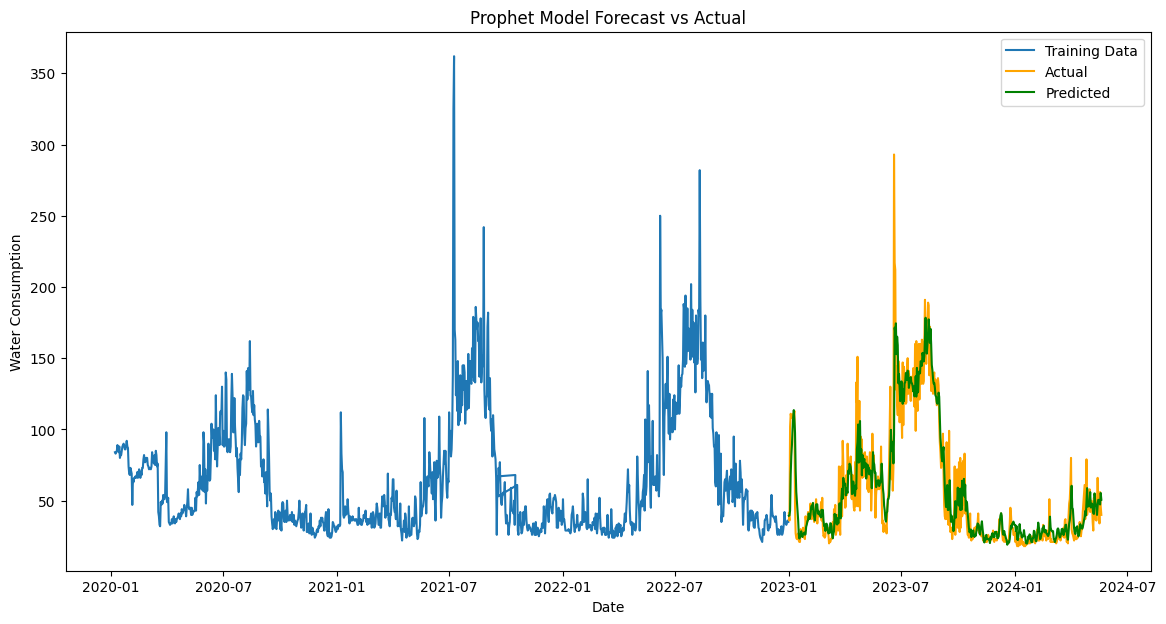

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

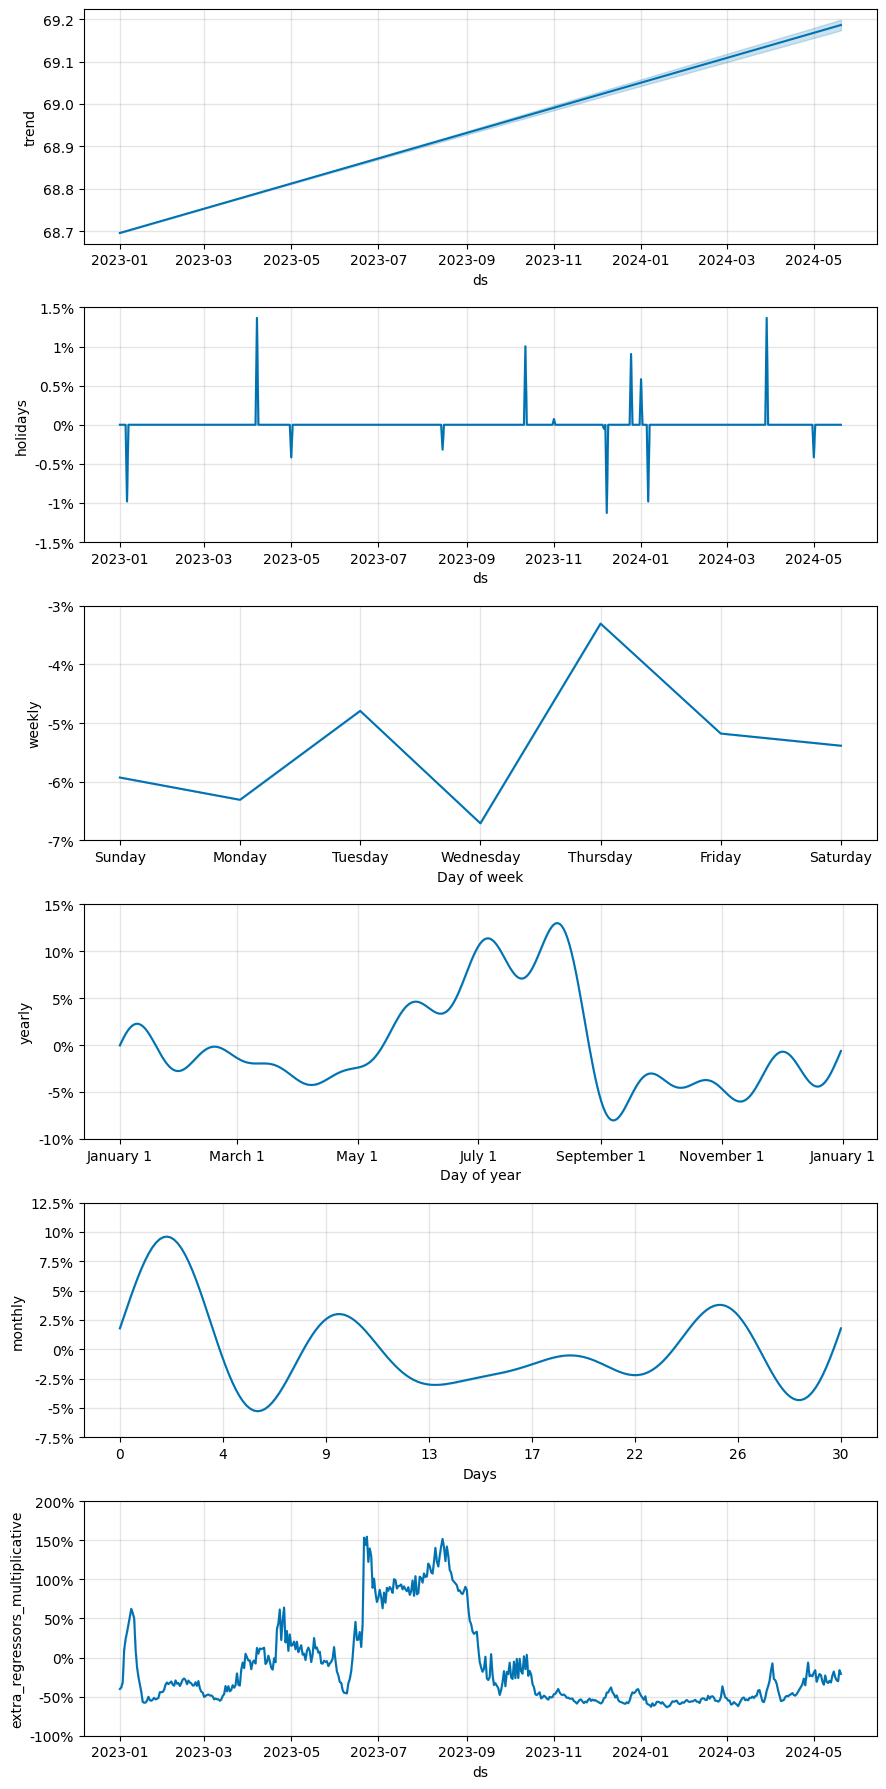

In [ ]:
# Method 1: Prophet with Advanced Feature Engineering

import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Handle missing values
df = df.dropna(subset=['y'])
df['tmax'] = df['tmax'].ffill()

# Create lag features
df['y_lag1'] = df['y'].shift(1)
df['y_lag7'] = df['y'].shift(7)
df['tmax_lag1'] = df['tmax'].shift(1)
df['tmax_lag7'] = df['tmax'].shift(7)

# Create rolling mean features
df['y_roll_mean_7'] = df['y'].rolling(window=7).mean()
df['tmax_roll_mean_7'] = df['tmax'].rolling(window=7).mean()

# Drop rows with NaN values resulting from shifting/rolling
df = df.dropna()

# Additional regressors
df['day_of_week'] = df['ds'].dt.dayofweek
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)

# List of regressors
regressors = [
    'tmax', 'tmax_lag1', 'tmax_lag7', 'tmax_roll_mean_7',
    'y_lag1', 'y_lag7', 'y_roll_mean_7',
    'day_of_week', 'is_weekend'
]

# Scale regressors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[regressors] = scaler.fit_transform(df[regressors])

# Split data into training and testing sets
split_date = '2023-01-01'
train = df[df['ds'] < split_date]
test = df[df['ds'] >= split_date]

# Initialize and fit the Prophet model
m = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.01,
    seasonality_prior_scale=15
)

# Add country holidays
m.add_country_holidays(country_name='ES')

# Add regressors
for regressor in regressors:
    m.add_regressor(regressor)

# Add custom seasonalities
m.add_seasonality(name='weekly', period=7, fourier_order=10)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
m.fit(train)

# Prepare future dataframe
future = test[['ds'] + regressors]

# Make predictions
forecast = m.predict(future)

# Evaluate the model
forecast_evaluation = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds')
mae = mean_absolute_error(forecast_evaluation['y'], forecast_evaluation['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_evaluation['y'], forecast_evaluation['yhat']))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(forecast_evaluation['y'], forecast_evaluation['yhat'])

print('Prophet Model with Advanced Features:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual', color='orange')
plt.plot(forecast_evaluation['ds'], forecast_evaluation['yhat'], label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('Prophet Model Forecast vs Actual')
plt.legend()
plt.show()

# Plot forecast components
m.plot_components(forecast)
plt.show()


# Method 2: XGBoost with Hyperparameter Tuning


Here, we use XGBoost with hyperparameter tuning to improve the model's performance.




**XGBoost with Hyperparameter Tuning is a powerful and flexible tool that can be effectively adapted for time series forecasting. While it is not inherently designed for time series data, through meticulous feature engineering, proper data splitting, and hyperparameter optimization, XGBoost can capture complex patterns and deliver high-accuracy forecasts. However, it's essential to balance its advantages with considerations like potential overfitting and the need for extensive feature preparation. Depending on the specific requirements and characteristics of your time series data, XGBoost can be an excellent addition to your forecasting toolkit, often complementing traditional time series models to enhance overall predictive performance.**

In [ ]:
# Method 2: XGBoost with Hyperparameter Tuning

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Handle missing values
df = df.dropna(subset=['y'])
df['tmax'] = df['tmax'].ffill()

# Create lag features
df['y_lag1'] = df['y'].shift(1)
df['y_lag7'] = df['y'].shift(7)
df['tmax_lag1'] = df['tmax'].shift(1)
df['tmax_lag7'] = df['tmax'].shift(7)

# Create rolling mean features
df['y_roll_mean_7'] = df['y'].rolling(window=7).mean()
df['tmax_roll_mean_7'] = df['tmax'].rolling(window=7).mean()

# Additional features
df['day_of_week'] = df['ds'].dt.dayofweek
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)

# Drop rows with NaN values
df = df.dropna()

# Features and target
features = [
    'tmax', 'tmax_lag1', 'tmax_lag7', 'tmax_roll_mean_7',
    'y_lag1', 'y_lag7', 'y_roll_mean_7',
    'day_of_week', 'is_weekend'
]
target = 'y'

# Scale features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split data
split_date = '2023-01-01'
train = df[df['ds'] < split_date]
test = df[df['ds'] >= split_date]
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Hyperparameter tuning
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.005, 0.01, 0.05],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
}

tscv = TimeSeriesSplit(n_splits=5)

xgb_model = xgb.XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_absolute_error',
    cv=tscv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print('XGBoost Model with Hyperparameter Tuning:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(train['ds'], y_train, label='Training Data')
plt.plot(test['ds'], y_test, label='Actual', color='orange')
plt.plot(test['ds'], y_pred, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('XGBoost Forecast vs Actual')
plt.legend()
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

# Method 3: LightGBM Model

This method utilizes LightGBM, another gradient boosting framework, to model the water consumption data.

In [ ]:
# Method 3: LightGBM Model

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Handle missing values
df = df.dropna(subset=['y'])
df['tmax'] = df['tmax'].ffill()

# Create lag features
df['y_lag1'] = df['y'].shift(1)
df['y_lag7'] = df['y'].shift(7)
df['tmax_lag1'] = df['tmax'].shift(1)
df['tmax_lag7'] = df['tmax'].shift(7)

# Create rolling mean features
df['y_roll_mean_7'] = df['y'].rolling(window=7).mean()
df['tmax_roll_mean_7'] = df['tmax'].rolling(window=7).mean()

# Additional features
df['day_of_week'] = df['ds'].dt.dayofweek
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)

# Drop rows with NaN values
df = df.dropna()

# Features and target
features = [
    'tmax', 'tmax_lag1', 'tmax_lag7', 'tmax_roll_mean_7',
    'y_lag1', 'y_lag7', 'y_roll_mean_7',
    'day_of_week', 'is_weekend'
]
target = 'y'

# Scale features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split data
split_date = '2023-01-01'
train = df[df['ds'] < split_date]
test = df[df['ds'] >= split_date]
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Prepare datasets for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train model
lgbm_model = lgb.train(
    params,
    train_data,
    num_boost_round=5000,
    valid_sets=[train_data, valid_data],
    early_stopping_rounds=100,
    verbose_eval=100
)

# Predict
y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print('LightGBM Model Results:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(train['ds'], y_train, label='Training Data')
plt.plot(test['ds'], y_test, label='Actual', color='orange')
plt.plot(test['ds'], y_pred, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('LightGBM Forecast vs Actual')
plt.legend()
plt.show()


TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

# Method 4: Stacking Ensemble



This method combines multiple models (XGBoost and LightGBM) using a stacking ensemble to improve performance.




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 1089, number of used features: 9
[LightGBM] [Info] Start training from score 64.475666
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1481
[LightGBM] [Info] Number of data points in the train set: 871, number of used features: 9
[LightGBM] [Info] Start training from score 62.371986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightG

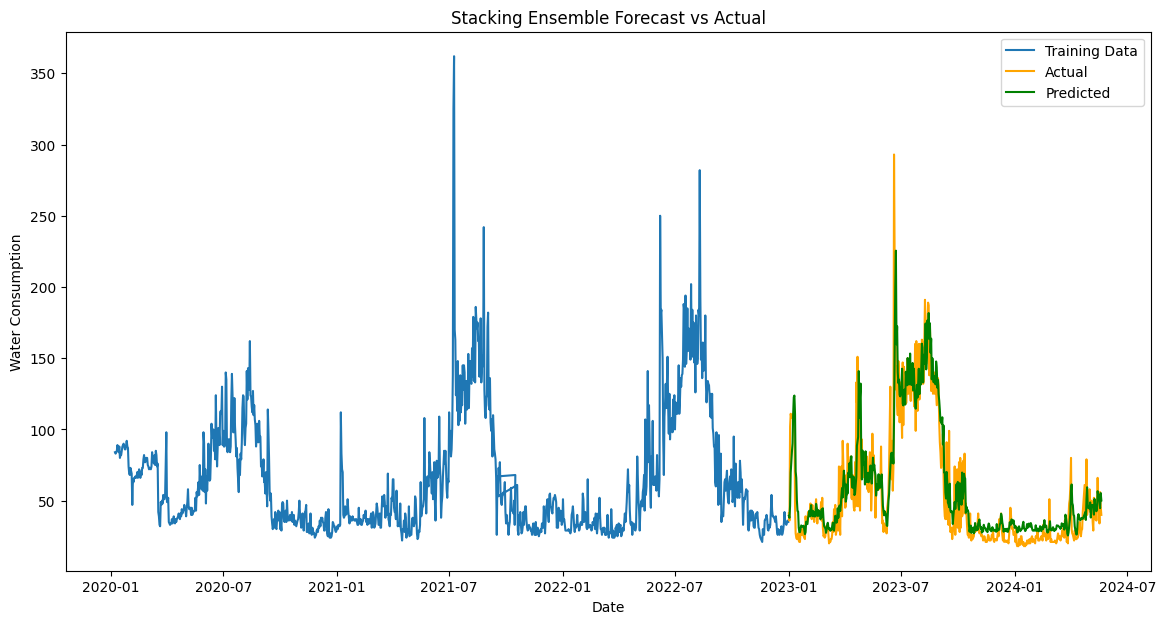

In [ ]:
# Method 4: Stacking Ensemble

import pandas as pd
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Handle missing values
df = df.dropna(subset=['y'])
df['tmax'] = df['tmax'].ffill()

# Create lag features
df['y_lag1'] = df['y'].shift(1)
df['y_lag7'] = df['y'].shift(7)
df['tmax_lag1'] = df['tmax'].shift(1)
df['tmax_lag7'] = df['tmax'].shift(7)

# Create rolling mean features
df['y_roll_mean_7'] = df['y'].rolling(window=7).mean()
df['tmax_roll_mean_7'] = df['tmax'].rolling(window=7).mean()

# Additional features
df['day_of_week'] = df['ds'].dt.dayofweek
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)

# Drop rows with NaN values
df = df.dropna()

# Features and target
features = [
    'tmax', 'tmax_lag1', 'tmax_lag7', 'tmax_roll_mean_7',
    'y_lag1', 'y_lag7', 'y_roll_mean_7',
    'day_of_week', 'is_weekend'
]
target = 'y'

# Scale features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split data
split_date = '2023-01-01'
train = df[df['ds'] < split_date]
test = df[df['ds'] >= split_date]
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Define base models
estimators = [
    ('xgb', xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=6, random_state=42)),
    ('lgbm', lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.01, num_leaves=31, random_state=42))
]

# Stacking regressor
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(),
    cv=5
)

# Fit the model
stacking_model.fit(X_train, y_train)

# Predict
y_pred = stacking_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print('Stacking Ensemble Results:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(train['ds'], y_train, label='Training Data')
plt.plot(test['ds'], y_test, label='Actual', color='orange')
plt.plot(test['ds'], y_pred, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('Stacking Ensemble Forecast vs Actual')
plt.legend()
plt.show()


# Method 5: LSTM Neural Network

In this method, we implement an LSTM neural network to capture temporal dependencies in the data.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0095 - val_loss: 0.0011
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - val_loss: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - val_loss: 9.5094e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0048 - val_loss: 0.0010
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0037 - val_loss: 8.6186e-04
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 - val_loss: 8.3032e-04
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - val_loss: 0.0010
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 -

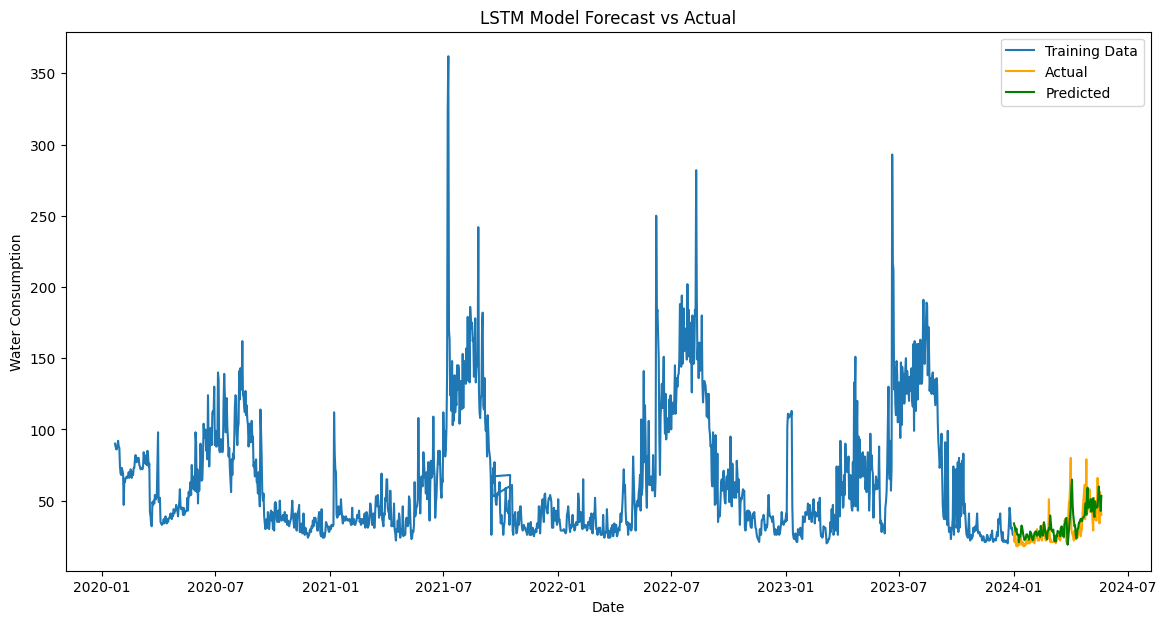

In [ ]:
# Updated Method 5: LSTM Neural Network

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Handle missing values
df = df.dropna(subset=['y'])
df['tmax'] = df['tmax'].ffill()

# Create lag features
df['y_lag1'] = df['y'].shift(1)
df['y_lag7'] = df['y'].shift(7)
df['tmax_lag1'] = df['tmax'].shift(1)
df['tmax_lag7'] = df['tmax'].shift(7)

# Create rolling mean features
df['y_roll_mean_7'] = df['y'].rolling(window=7).mean()
df['tmax_roll_mean_7'] = df['tmax'].rolling(window=7).mean()

# Additional features
df['day_of_week'] = df['ds'].dt.dayofweek
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)

# Drop rows with NaN values resulting from shifting/rolling
df = df.dropna()

# Features and target
features = [
    'tmax', 'tmax_lag1', 'tmax_lag7', 'tmax_roll_mean_7',
    'y_lag1', 'y_lag7', 'y_roll_mean_7',
    'day_of_week', 'is_weekend'
]

# Scale features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(df[features])
scaled_target = target_scaler.fit_transform(df[['y']])

# Combine scaled features and target
scaled_data = np.hstack((scaled_features, scaled_target))

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, :-1])  # All columns except the last (target)
        y.append(data[i, -1])  # The last column (target)
    return np.array(X), np.array(y)

seq_length = 14  # Two weeks
X, y = create_sequences(scaled_data, seq_length)

# Create date array corresponding to y
dates = df['ds'].iloc[seq_length:].reset_index(drop=True)

# Split data based on date
split_date = pd.to_datetime('2024-01-01')

train_indices = dates < split_date
test_indices = dates >= split_date

X_train_lstm = X[train_indices]
X_test_lstm = X[test_indices]
y_train_lstm = y[train_indices]
y_test_lstm = y[test_indices]
dates_train = dates[train_indices]
dates_test = dates[test_indices]

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1
)

# Predict
y_pred_lstm = model.predict(X_test_lstm)

# Inverse scale the predictions
y_test_inv = target_scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
y_pred_inv = target_scaler.inverse_transform(y_pred_lstm).flatten()

# Evaluate
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print('LSTM Model Results:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(dates_train, target_scaler.inverse_transform(y_train_lstm.reshape(-1, 1)).flatten(), label='Training Data')
plt.plot(dates_test, y_test_inv, label='Actual', color='orange')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('LSTM Model Forecast vs Actual')
plt.legend()
plt.show()


Prophet Model optimize

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbpaikkrv/31michnv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbpaikkrv/3t7e844o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12322', 'data', 'file=/tmp/tmpbpaikkrv/31michnv.json', 'init=/tmp/tmpbpaikkrv/3t7e844o.json', 'output', 'file=/tmp/tmpbpaikkrv/prophet_modeleg63ffn7/prophet_model-20240914131207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error: 19.32
Root Mean Squared Error: 28.37


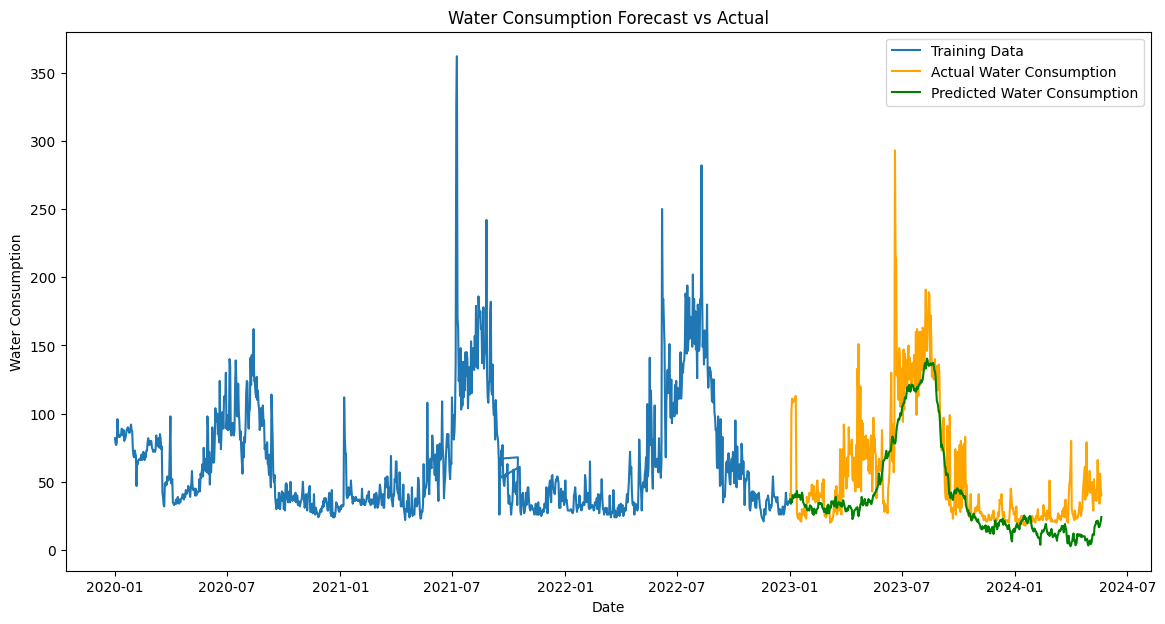

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

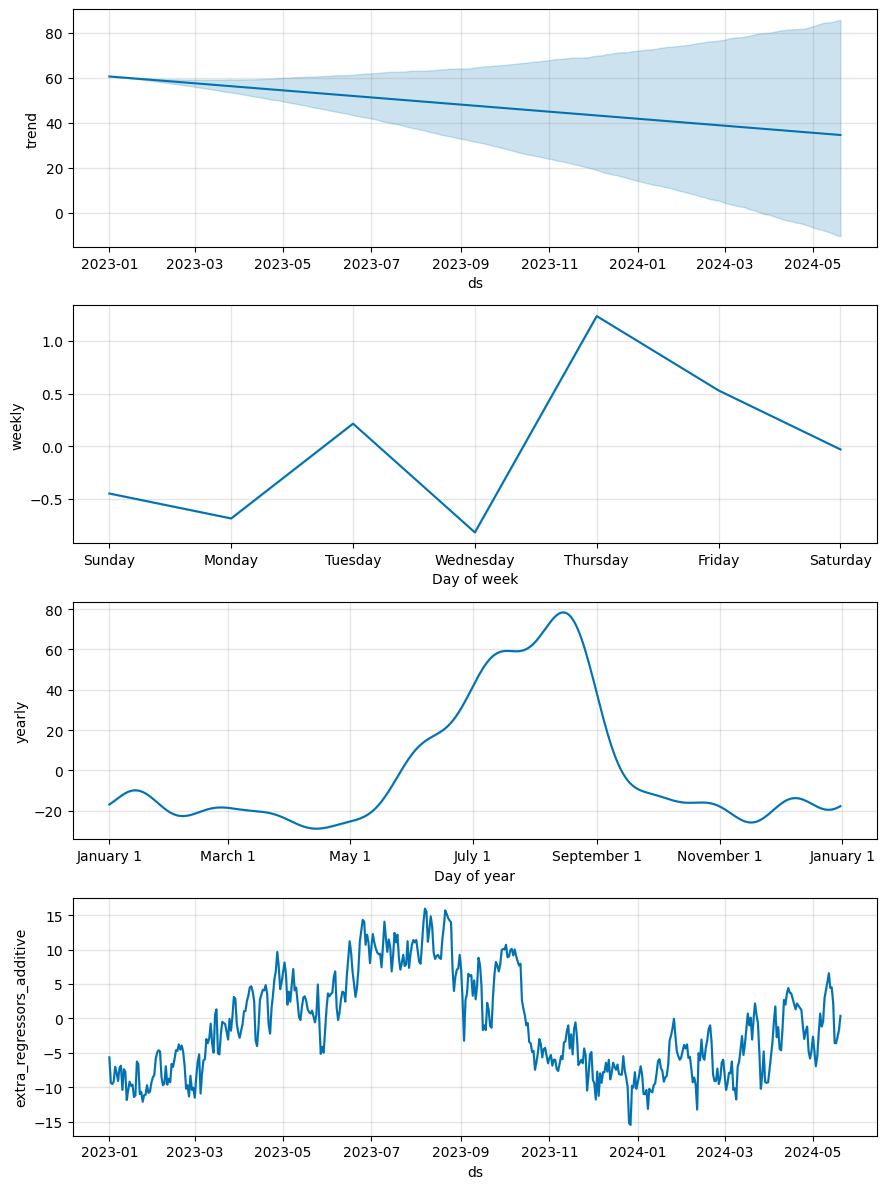

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.rename(columns={'Date': 'ds', 'Value': 'y'})

# Handle missing values in 'y'
df = df.dropna(subset=['y'])

# List of regressor columns
regressors = ['tmax']

# Handle missing values in regressors - Consider interpolation instead of ffill
df[regressors] = df[regressors].interpolate()

# Split data into training and testing sets
split_date = '2023-01-01'
train = df[df['ds'] < split_date].copy()
test = df[df['ds'] >= split_date].copy()

# Initialize and fit the model
# Experiment with different changepoint_prior_scale, seasonality_prior_scale
m = Prophet(changepoint_prior_scale=0.05, seasonality_prior_scale=10)

# Add regressors to the model
for regressor in regressors:
    m.add_regressor(regressor)

# Fit the model to the training data
m.fit(train)

# Prepare future dataframe for prediction
future = test[['ds'] + regressors].copy()

# Make predictions
forecast = m.predict(future)

# Evaluate the model
forecast_evaluation = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds')

mae = mean_absolute_error(forecast_evaluation['y'], forecast_evaluation['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_evaluation['y'], forecast_evaluation['yhat']))

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plot the forecast against the actual values
plt.figure(figsize=(14, 7))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Water Consumption', color='orange')
plt.plot(forecast_evaluation['ds'], forecast_evaluation['yhat'], label='Predicted Water Consumption', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('Water Consumption Forecast vs Actual')
plt.legend()
plt.show()

# Plot the forecast components
m.plot_components(forecast)
plt.show()


# Mehran's Model 1

In [ ]:
! pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


Reloading Tuner from my_dir/lstm_hyperband/tuner0.json
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0053 - val_loss: 8.2427e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0047 - val_loss: 8.6024e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0036 - val_loss: 9.8153e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0035 - val_loss: 9.9752e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - val_loss: 0.0012
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
LSTM Model Results:
Mean Absolute Error: 7.21
Root Mean Squared Error: 9.88
Mean Absolute Percentage Error: 25.16%


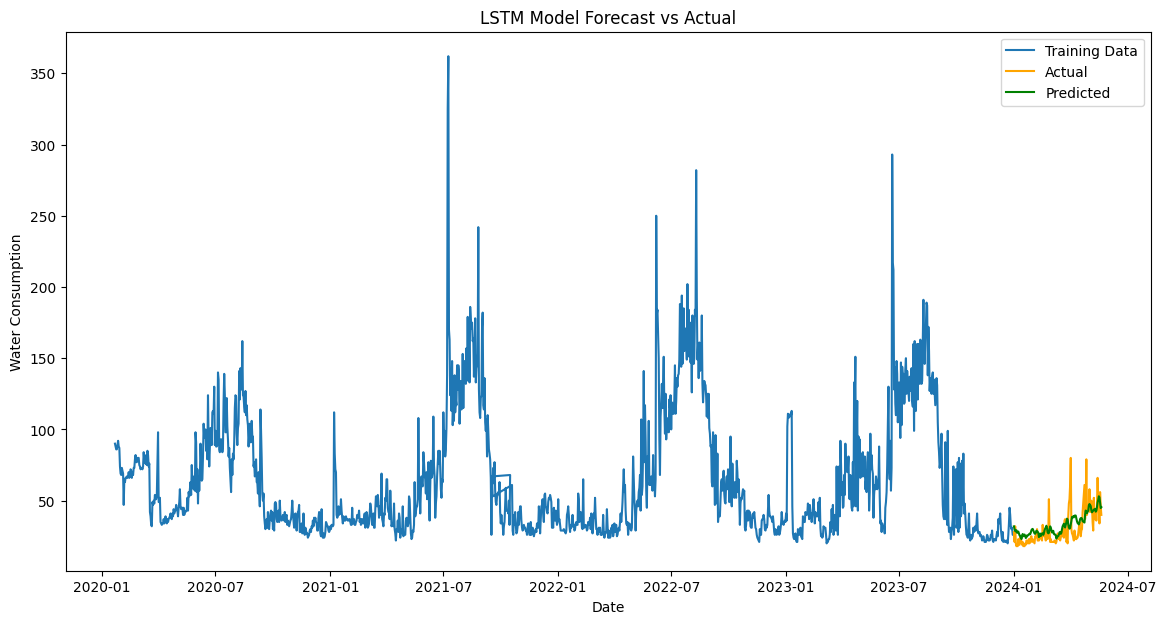

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from kerastuner.tuners import Hyperband

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Handle missing values
df = df.dropna(subset=['y'])
df['tmax'] = df['tmax'].ffill()

# Create lag features
df['y_lag1'] = df['y'].shift(1)
df['y_lag7'] = df['y'].shift(7)
df['tmax_lag1'] = df['tmax'].shift(1)
df['tmax_lag7'] = df['tmax'].shift(7)

# Create rolling mean features
df['y_roll_mean_7'] = df['y'].rolling(window=7).mean()
df['tmax_roll_mean_7'] = df['tmax'].rolling(window=7).mean()

# Additional features
df['day_of_week'] = df['ds'].dt.dayofweek
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)

# Drop rows with NaN values resulting from shifting/rolling
df = df.dropna()

# Features and target
features = [
    'tmax', 'tmax_lag1', 'tmax_lag7', 'tmax_roll_mean_7',
    'y_lag1', 'y_lag7', 'y_roll_mean_7',
    'day_of_week', 'is_weekend'
]

# Scale features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(df[features])
scaled_target = target_scaler.fit_transform(df[['y']])

# Combine scaled features and target
scaled_data = np.hstack((scaled_features, scaled_target))

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, :-1])  # All columns except the last (target)
        y.append(data[i, -1])  # The last column (target)
    return np.array(X), np.array(y)

seq_length = 14  # Two weeks
X, y = create_sequences(scaled_data, seq_length)

# Create date array corresponding to y
dates = df['ds'].iloc[seq_length:].reset_index(drop=True)

# Split data based on date
split_date = pd.to_datetime('2024-01-01')

train_indices = dates < split_date
test_indices = dates >= split_date

X_train_lstm = X[train_indices]
X_test_lstm = X[test_indices]
y_train_lstm = y[train_indices]
y_test_lstm = y[test_indices]
dates_train = dates[train_indices]
dates_test = dates[test_indices]

# Define the model builder function for Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential()
    # Tune the number of units in the LSTM layer
    lstm_units = hp.Choice('units', values=[32, 64, 128])
    model.add(tf.keras.layers.LSTM(lstm_units, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(tf.keras.layers.Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize the Keras Tuner
tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='lstm_hyperband'
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Search for the best model
tuner.search(X_train_lstm, y_train_lstm, epochs=50, validation_data=(X_test_lstm, y_test_lstm), callbacks=[early_stopping], verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model further if needed
history = best_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    callbacks=[early_stopping],
    verbose=1
)

# Predict
y_pred_lstm = best_model.predict(X_test_lstm)

# Inverse scale the predictions
y_test_inv = target_scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
y_pred_inv = target_scaler.inverse_transform(y_pred_lstm).flatten()

# Evaluate
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print('LSTM Model Results:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(dates_train, target_scaler.inverse_transform(y_train_lstm.reshape(-1, 1)).flatten(), label='Training Data')
plt.plot(dates_test, y_test_inv, label='Actual', color='orange')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('LSTM Model Forecast vs Actual')
plt.legend()
plt.show()

# Mehran's Model 2

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0123 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0046 - val_loss: 8.9663e-04 - learning_rate: 0.0010
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0055 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0047 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - val_loss: 0.0010 - learning_rate: 0.0010
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0040 - val_loss: 0.0011 - learning_rate: 5.0000e-04
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0034 - val_loss: 0.0010 - learning_rate: 5.0000e-04
5/5 ━━━━━━━━━━━━━━

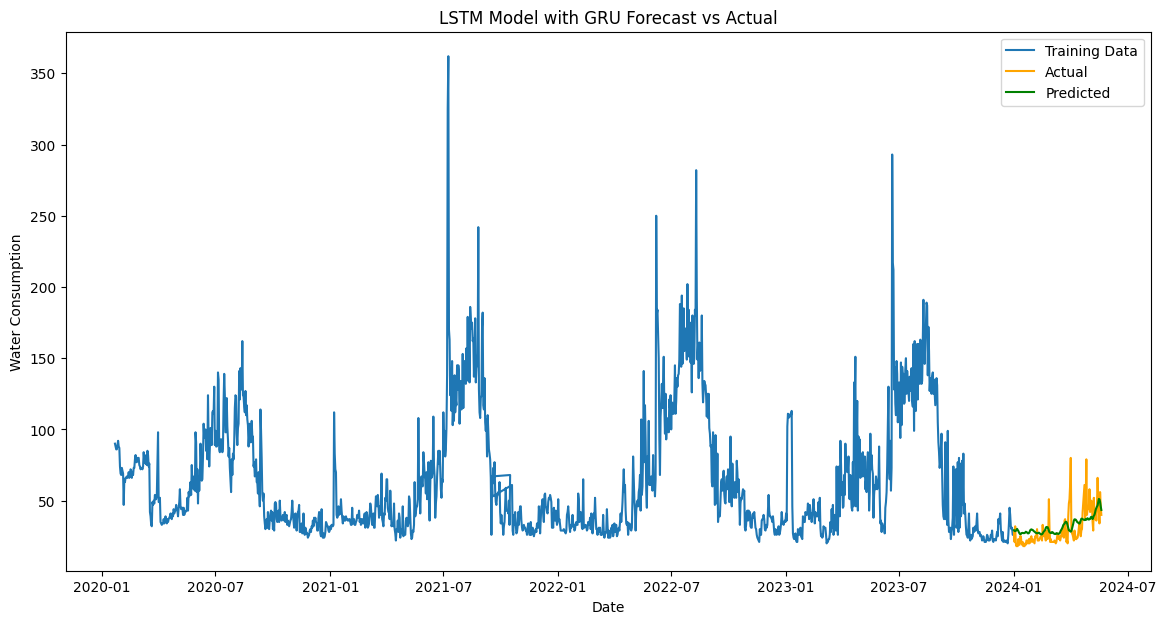

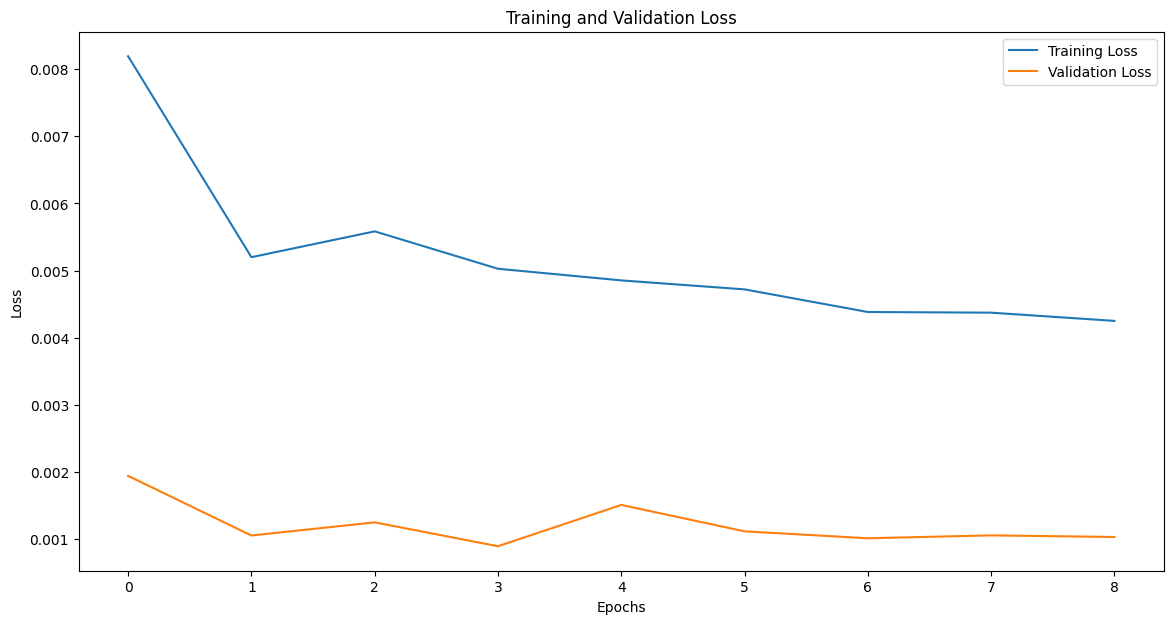

In [ ]:
# Updated Method 5: LSTM Neural Network with additional layers and GRU

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Handle missing values
df = df.dropna(subset=['y'])
df['tmax'] = df['tmax'].ffill()

# Create lag features
df['y_lag1'] = df['y'].shift(1)
df['y_lag7'] = df['y'].shift(7)
df['tmax_lag1'] = df['tmax'].shift(1)
df['tmax_lag7'] = df['tmax'].shift(7)

# Create rolling mean features
df['y_roll_mean_7'] = df['y'].rolling(window=7).mean()
df['tmax_roll_mean_7'] = df['tmax'].rolling(window=7).mean()

# Additional features
df['day_of_week'] = df['ds'].dt.dayofweek
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)

# Drop rows with NaN values resulting from shifting/rolling
df = df.dropna()

# Features and target
features = [
    'tmax', 'tmax_lag1', 'tmax_lag7', 'tmax_roll_mean_7',
    'y_lag1', 'y_lag7', 'y_roll_mean_7',
    'day_of_week', 'is_weekend'
]

# Scale features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(df[features])
scaled_target = target_scaler.fit_transform(df[['y']])

# Combine scaled features and target
scaled_data = np.hstack((scaled_features, scaled_target))

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, :-1])  # All columns except the last (target)
        y.append(data[i, -1])  # The last column (target)
    return np.array(X), np.array(y)

seq_length = 14  # Two weeks
X, y = create_sequences(scaled_data, seq_length)

# Create date array corresponding to y
dates = df['ds'].iloc[seq_length:].reset_index(drop=True)

# Split data based on date
split_date = pd.to_datetime('2024-01-01')

train_indices = dates < split_date
test_indices = dates >= split_date

X_train_lstm = X[train_indices]
X_test_lstm = X[test_indices]
y_train_lstm = y[train_indices]
y_test_lstm = y[test_indices]
dates_train = dates[train_indices]
dates_test = dates[test_indices]

# Build the LSTM model with additional layers and GRU
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    tf.keras.layers.GRU(32, activation='relu', return_sequences=False),  # Added GRU layer
    tf.keras.layers.Dense(64, activation='relu'),  # Added Dense layer
    tf.keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with early stopping and learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Predict
y_pred_lstm = model.predict(X_test_lstm)

# Inverse scale the predictions
y_test_inv = target_scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
y_pred_inv = target_scaler.inverse_transform(y_pred_lstm).flatten()

# Evaluate
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print('LSTM Model with Additional Layers and GRU Results:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'R² Score: {r2:.2f}')

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(dates_train, target_scaler.inverse_transform(y_train_lstm.reshape(-1, 1)).flatten(), label='Training Data')
plt.plot(dates_test, y_test_inv, label='Actual', color='orange')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('LSTM Model with GRU Forecast vs Actual')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Mehran's Model 3 LSTM

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0130 - val_loss: 9.2485e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - val_loss: 0.0011
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - val_loss: 9.6777e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - val_loss: 9.3023e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - val_loss: 9.0250e-04
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0051 - val_loss: 0.0018
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - val_loss: 8.4764e-04
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - val_loss: 8.1392e-04
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0

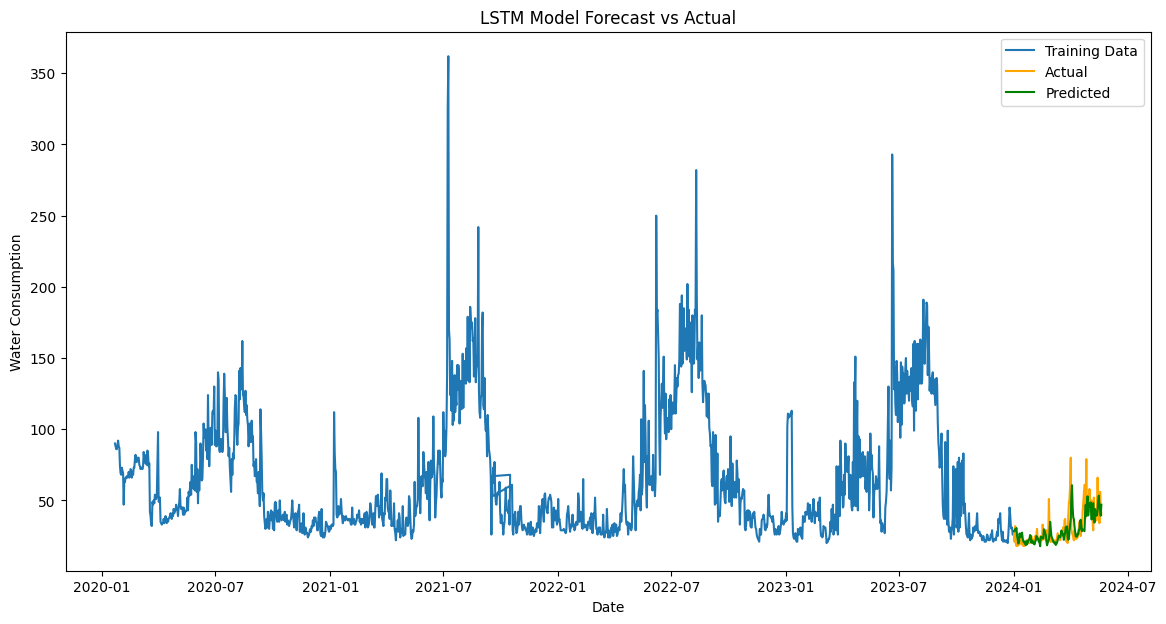

In [ ]:
# Updated Method 5: LSTM Neural Network

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, fbeta_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Data1.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Handle missing values
df = df.dropna(subset=['y'])
df['tmax'] = df['tmax'].ffill()

# Create lag features
df['y_lag1'] = df['y'].shift(1)
df['y_lag7'] = df['y'].shift(7)
df['tmax_lag1'] = df['tmax'].shift(1)
df['tmax_lag7'] = df['tmax'].shift(7)

# Create rolling mean features
df['y_roll_mean_7'] = df['y'].rolling(window=7).mean()
df['tmax_roll_mean_7'] = df['tmax'].rolling(window=7).mean()

# Additional features
df['day_of_week'] = df['ds'].dt.dayofweek
df['is_weekend'] = (df['ds'].dt.weekday >= 5).astype(int)

# Drop rows with NaN values resulting from shifting/rolling
df = df.dropna()

# Features and target
features = [
    'tmax', 'tmax_lag1', 'tmax_lag7', 'tmax_roll_mean_7',
    'y_lag1', 'y_lag7', 'y_roll_mean_7',
    'day_of_week', 'is_weekend'
]

# Scale features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(df[features])
scaled_target = target_scaler.fit_transform(df[['y']])

# Combine scaled features and target
scaled_data = np.hstack((scaled_features, scaled_target))

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, :-1])  # All columns except the last (target)
        y.append(data[i, -1])  # The last column (target)
    return np.array(X), np.array(y)

seq_length = 14  # Two weeks
X, y = create_sequences(scaled_data, seq_length)

# Create date array corresponding to y
dates = df['ds'].iloc[seq_length:].reset_index(drop=True)

# Split data based on date
split_date = pd.to_datetime('2024-01-01')

train_indices = dates < split_date
test_indices = dates >= split_date

X_train_lstm = X[train_indices]
X_test_lstm = X[test_indices]
y_train_lstm = y[train_indices]
y_test_lstm = y[test_indices]
dates_train = dates[train_indices]
dates_test = dates[test_indices]

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1
)

# Predict
y_pred_lstm = model.predict(X_test_lstm)

# Inverse scale the predictions
y_test_inv = target_scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
y_pred_inv = target_scaler.inverse_transform(y_pred_lstm).flatten()

# Evaluate
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

# For F2 Score, we need to binarize the target. We'll classify it as '1' if the prediction is above the median.
y_test_bin = np.where(y_test_inv > np.median(y_test_inv), 1, 0)
y_pred_bin = np.where(y_pred_inv > np.median(y_pred_inv), 1, 0)

# Calculate F2 Score
f2_score = fbeta_score(y_test_bin, y_pred_bin, beta=2)

print('LSTM Model Results:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'F2 Score: {f2_score:.2f}')

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(dates_train, target_scaler.inverse_transform(y_train_lstm.reshape(-1, 1)).flatten(), label='Training Data')
plt.plot(dates_test, y_test_inv, label='Actual', color='orange')
plt.plot(dates_test, y_pred_inv, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('LSTM Model Forecast vs Actual')
plt.legend()
plt.show()
